6_neda_mimfpt_(ML_Lin_Reg_Polynomial)

Engin Abdan

### Import libraries

In [188]:
import pandas as pd      
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.preprocessing import PolynomialFeatures 

from scipy.stats import skew
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

### Data infos

In [189]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [190]:
stu.head(1)

,Unnamed: 0,Student,Gender,MI_Cat,Plt_Or_Not,Flight_Mean,Exams_Mean,Sprt_Mean,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Ins_of_Stu_Plt
0,0,Student1,1,Intrap,1,95,87,89,20,19,10,16,13,16,17,22,insructor32


In [191]:
drop_list = ["Unnamed: 0","Exams_Mean","Sprt_Mean", "Ins_of_Stu_Plt","Student", "Gender", "Plt_Or_Not"]

In [192]:
stu.drop(drop_list, inplace=True, axis=1)

In [193]:
stu.head(1)

,MI_Cat,Flight_Mean,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,Intrap,95,20,19,10,16,13,16,17,22


In [194]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MI_Cat       100 non-null    object
 1   Flight_Mean  100 non-null    int64 
 2   Ling_Int     100 non-null    int64 
 3   Math_Int     100 non-null    int64 
 4   Spa_Int      100 non-null    int64 
 5   Mus_Int      100 non-null    int64 
 6   Nat_Int      100 non-null    int64 
 7   Body_Int     100 non-null    int64 
 8   Interp_Int   100 non-null    int64 
 9   Intrap_Int   100 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 7.9+ KB


In [195]:
stu.describe()

,Flight_Mean,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,75.000000,17.720000,17.750000,17.81000,17.860000,18.160000,17.200000,17.780000,18.070000
std,12.092238,3.068511,3.655285,3.04742,3.110815,3.740901,2.670452,2.865962,2.875374
min,55.000000,11.000000,10.000000,10.00000,10.000000,10.000000,10.000000,12.000000,13.000000
25%,63.750000,16.000000,15.000000,15.75000,16.000000,15.750000,15.000000,16.000000,16.000000
50%,75.000000,17.000000,17.000000,17.50000,17.500000,18.000000,17.000000,18.000000,18.000000
75%,86.000000,20.000000,19.000000,20.00000,20.000000,20.000000,19.000000,19.000000,20.000000
max,98.000000,26.000000,33.000000,26.00000,26.000000,33.000000,23.000000,26.000000,26.000000


In [196]:
stu.shape

(100, 10)

### Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

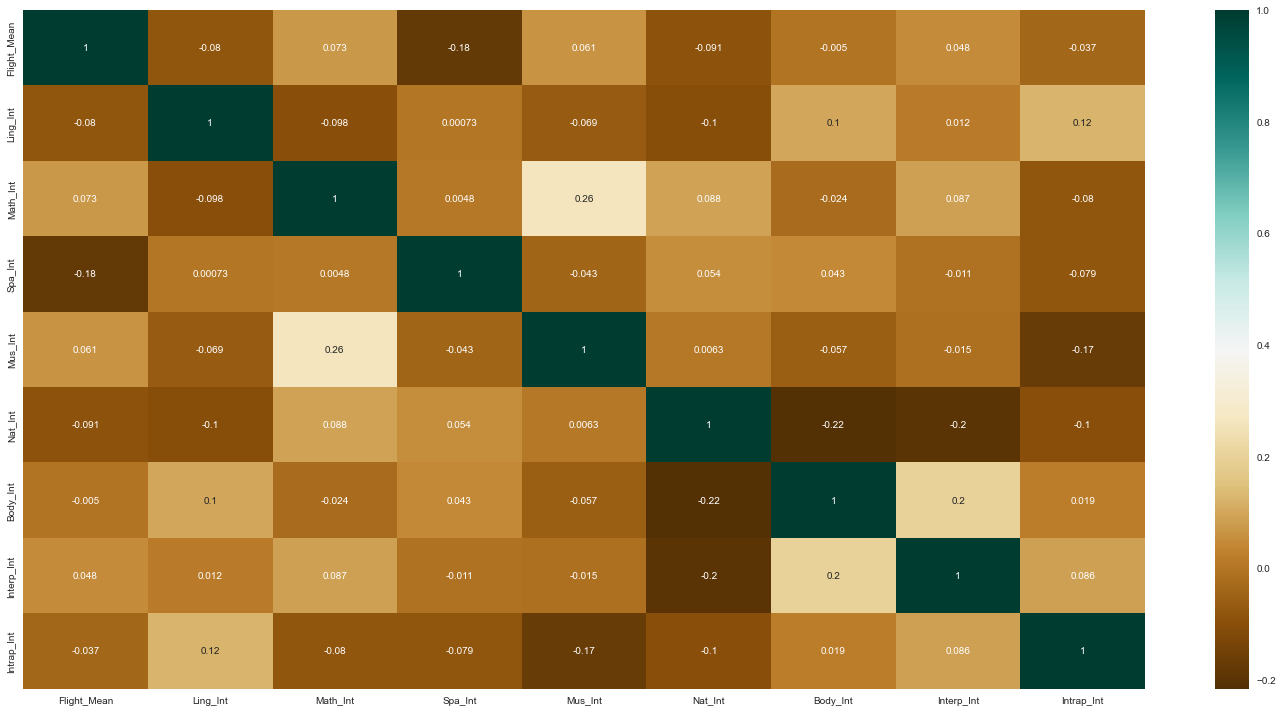

In [197]:
plt.figure(figsize=(20,10))
sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
plt.tight_layout()
plt.show

### Pairplot

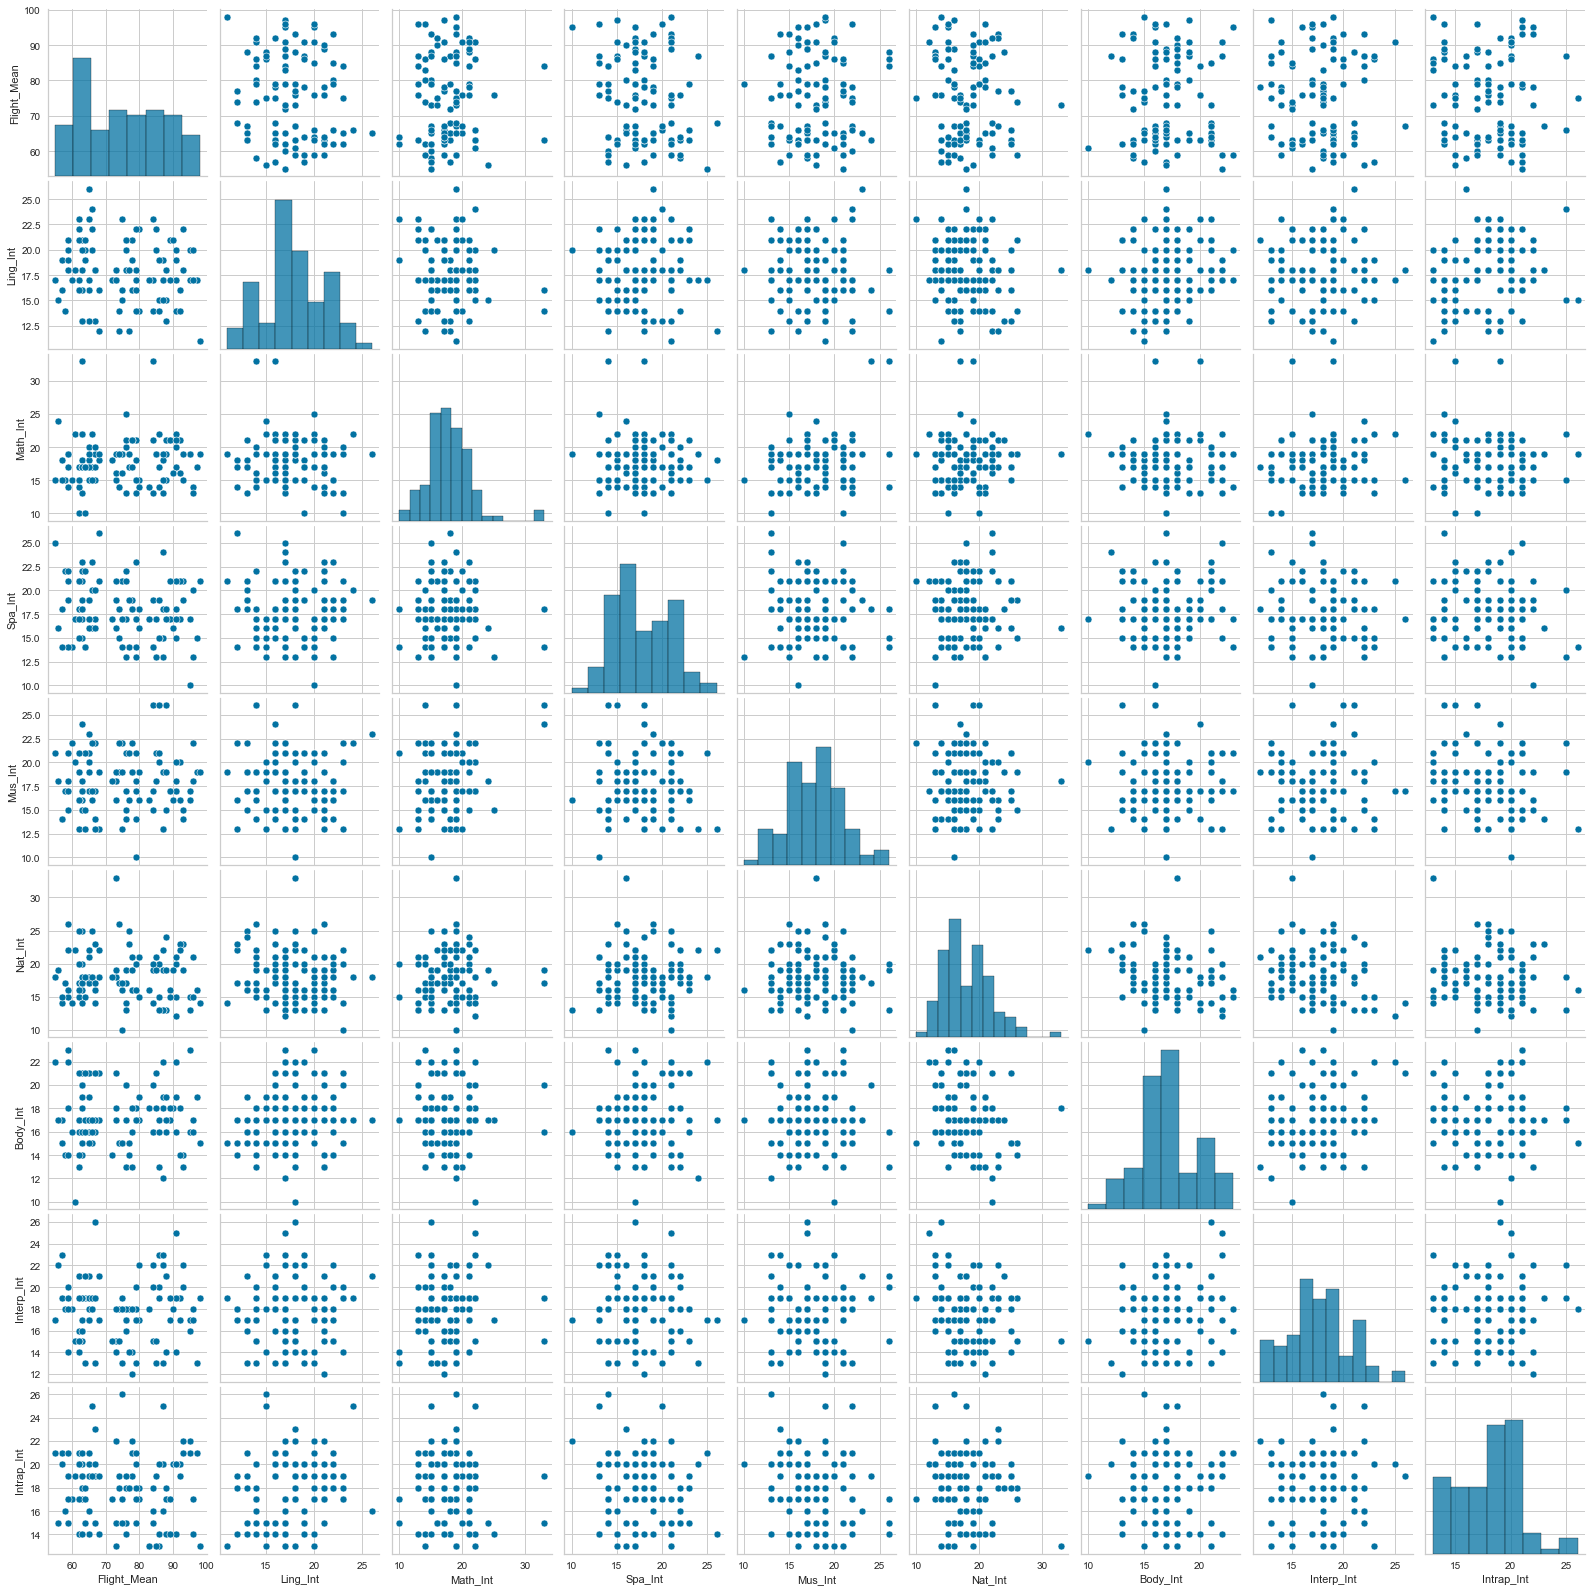

In [198]:
sns.pairplot(stu)

### Skew

In [199]:
x = stu.drop(columns=["MI_Cat", "Flight_Mean"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Corr Flight Mean & The MI Type

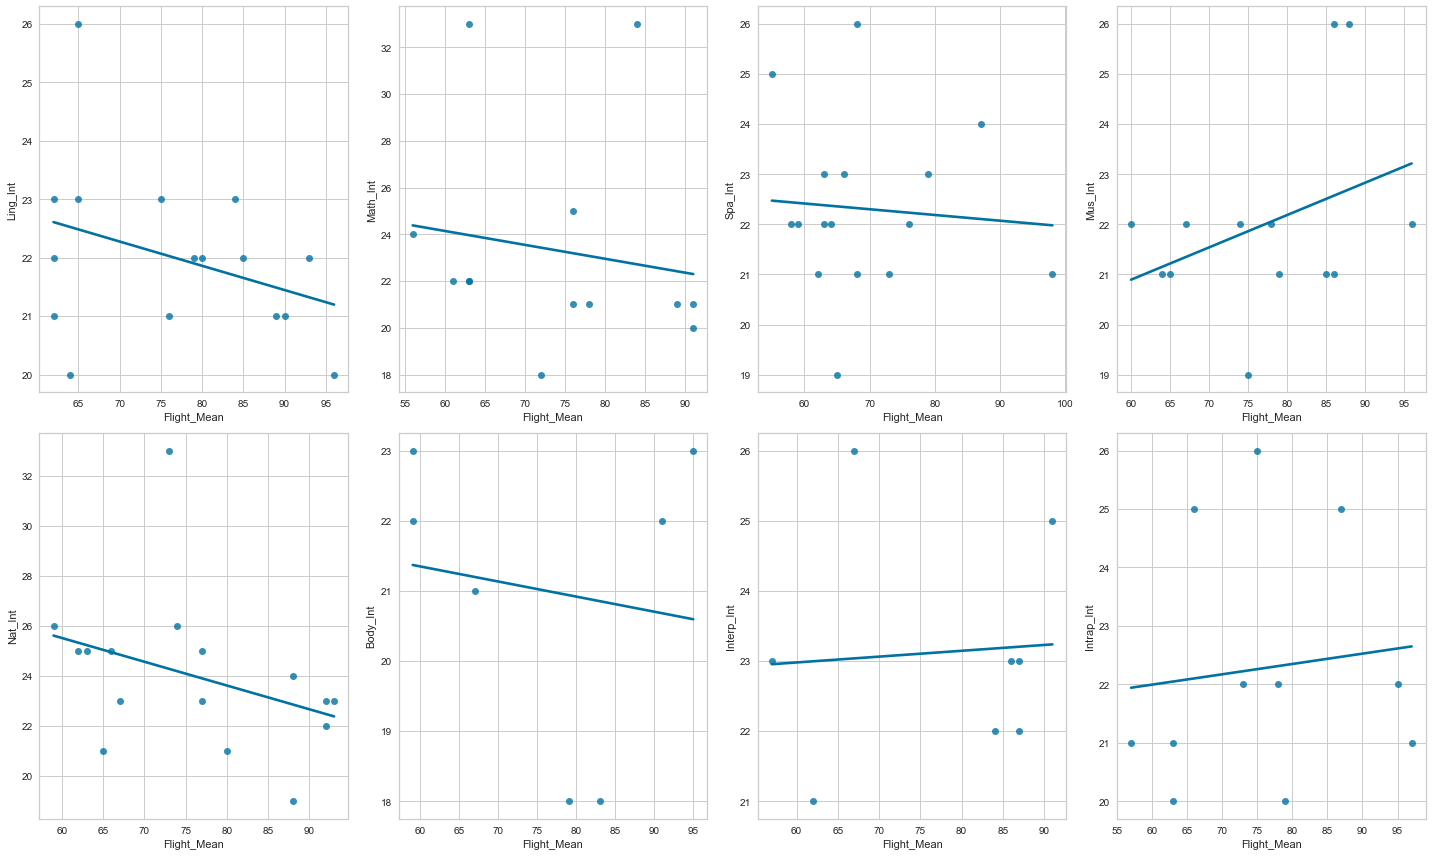

In [200]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,12))
x = range(2)
y = range(4)
k = 2

while k < 10:
    for i in x:
        for j in y:
            df = stu[stu["MI_Cat"] == stu.columns[k].rpartition('_')[0]]
            a = df.Flight_Mean
            b = df[df.columns[k]]
            sns.regplot(data=df, x=a, y=b, ci=None, ax=ax[i,j])
            k+=1
plt.tight_layout();

### Corr Grouped by MI_Cat, Flight Mean & The MI Type

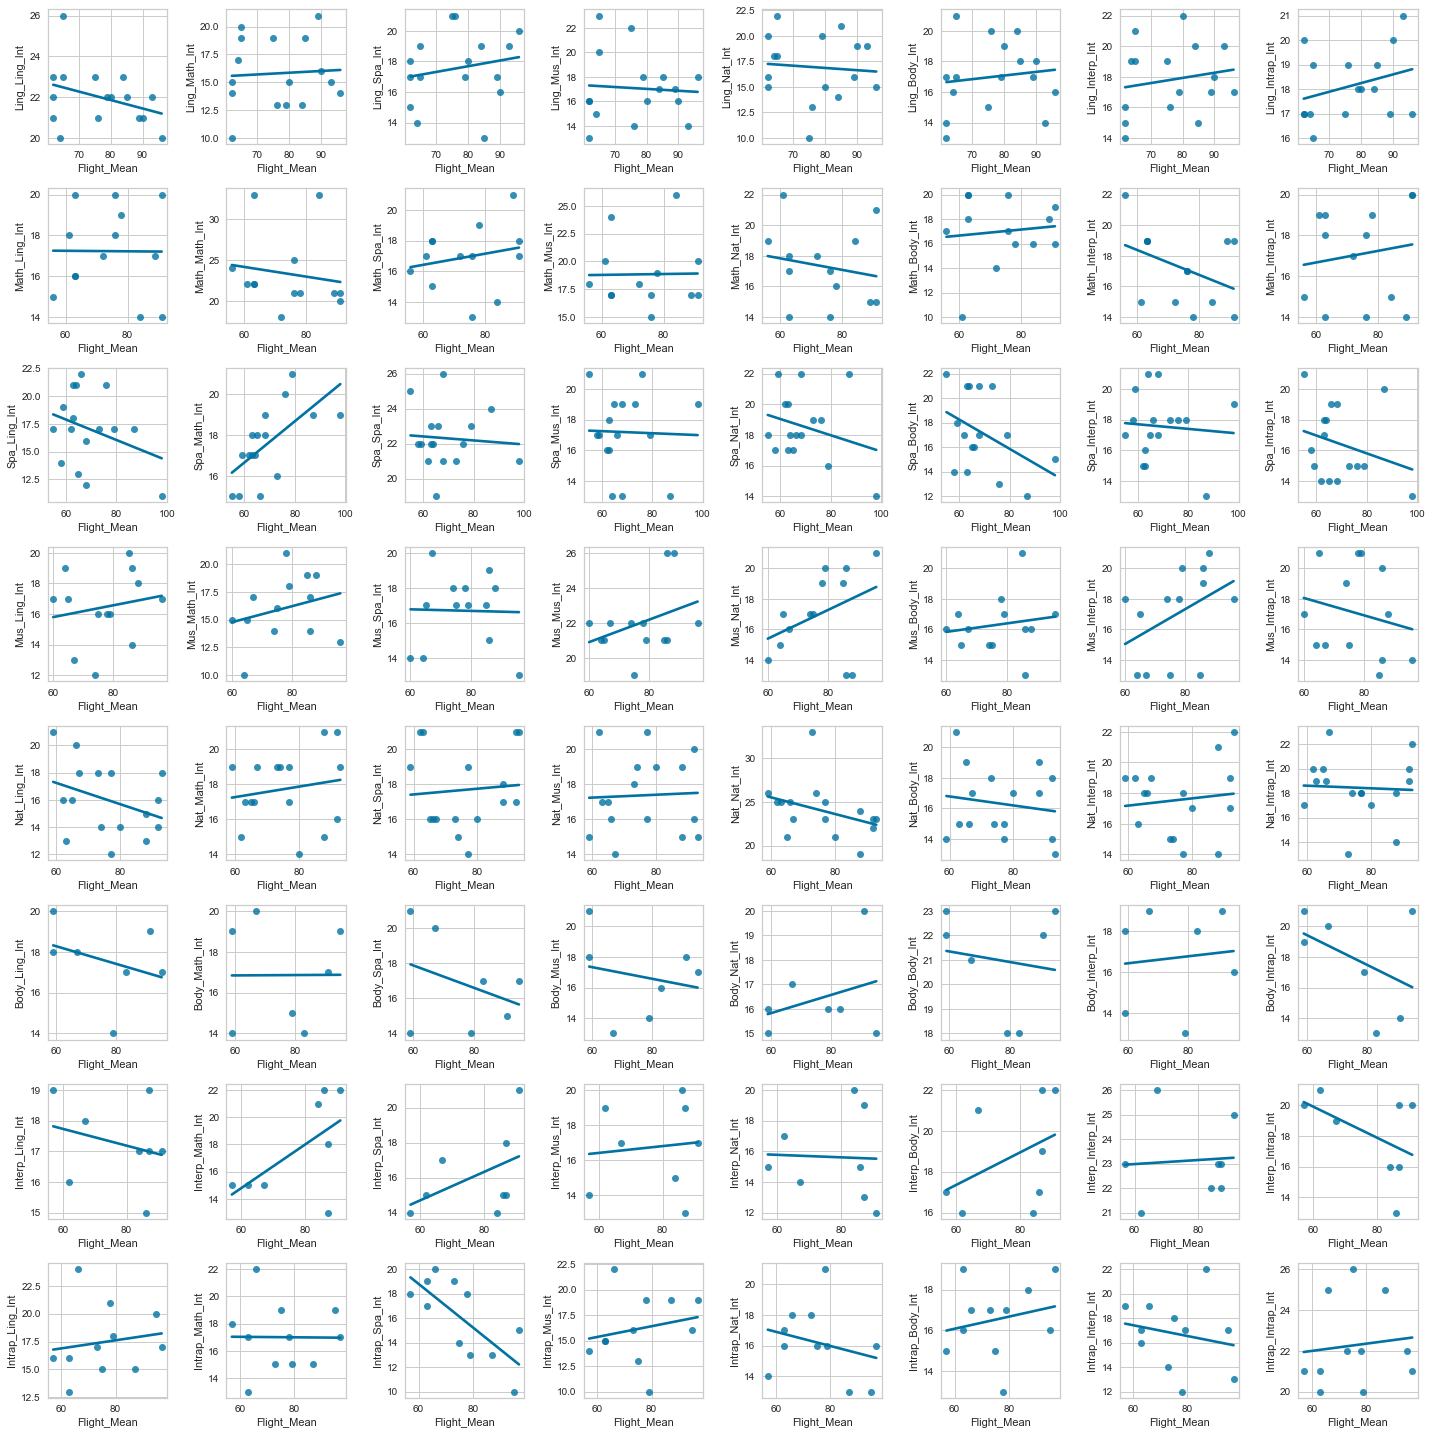

In [201]:
fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(20,20))
x = range(8)
y = range(8)
k = 2

while k < 10:
    for i in x:
        w = stu.columns[k].rpartition('_')[0]
        df = stu[stu["MI_Cat"] == w]
        m = 2
        while m < 10:
            for j in y:
                a = df.Flight_Mean
                b = df[df.columns[m]]
                sns.regplot(data=df, x=a, y=b, ci=None, ax=ax[i,j])
                ax[i,j].set_xlabel("Flight_Mean")
                ax[i,j].set_ylabel(f"{w}_{df.columns[m]}")
                m+=1
        k+=1
plt.tight_layout();

### The Optimal Degree of Poly

In [202]:
x = stu.drop(columns=["MI_Cat","Flight_Mean"])
y = stu["Flight_Mean"]

In [203]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(x)
        
        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(x_train, y_train)
        
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors}, index=[i for i in range(1,d)])
        

In [204]:
poly(10)

,train_rmse_errors,test_rmse_errors
1,1.136401e+01,13.574605
2,7.482583e+00,20.946783
3,1.066304e-12,103.297173
4,5.189172e-13,113.660019
5,3.028637e-13,127.942498
6,2.466091e-13,146.474928
7,2.239957e-13,170.310806
8,2.728244e-13,201.101957
9,3.184683e-13,240.854392


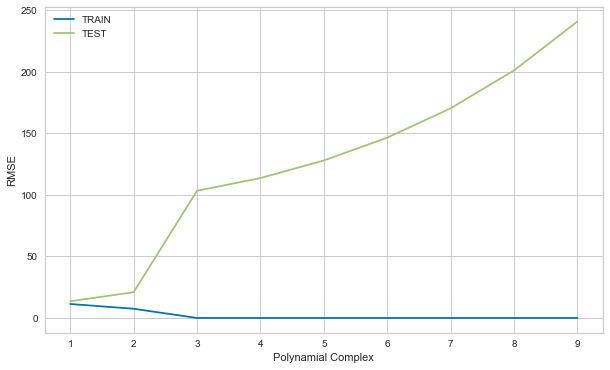

In [205]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

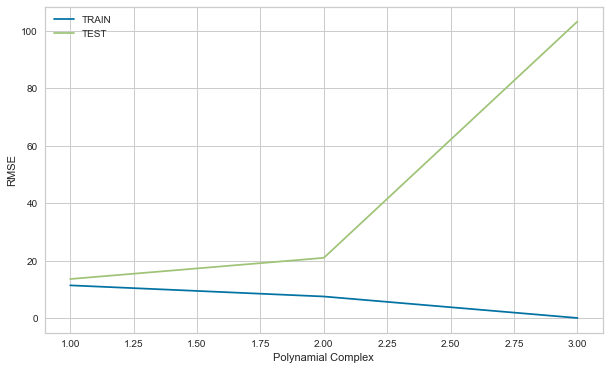

In [206]:
plt.plot(range(1,4), poly(4)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,4), poly(4)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

### Polynomial Converter

In [207]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [208]:
poly_features = polynomial_converter.fit_transform(x)
poly_features

array([[ 20.,  19.,  10., ..., 289., 374., 484.],
       [ 12.,  18.,  26., ..., 289., 238., 196.],
       [ 17.,  19.,  17., ..., 256., 336., 441.],
       ...,
       [ 18.,  20.,  20., ..., 361., 380., 400.],
       [ 19.,  17.,  19., ..., 361., 380., 400.],
       [ 16.,  18.,  17., ..., 400., 420., 441.]])

In [209]:
poly_features.shape

(100, 44)

### Train_Test Split

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 42)

In [212]:
print(f"x_train_shape\t: {x_train.shape}")
print(f"x_test_shape\t: {x_test.shape}")
print(f"y_train_shape\t: {y_train.shape}")
print(f"y_test_shape\t: {y_test.shape}")

x_train_shape	: (70, 44)
x_test_shape	: (30, 44)
y_train_shape	: (70,)
y_test_shape	: (30,)


### Model Fit

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
model_poly = LinearRegression()

In [215]:
model_poly.fit(x_train, y_train)

LinearRegression()

In [216]:
y_test_pred = model_poly.predict(x_test)

In [217]:
my_dict = {"Actual": y_test, "pred": y_test_pred, "residual": y_test - y_test_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
83,85,119.825812,-34.825812
53,87,56.905397,30.094603
70,90,83.257926,6.742074
45,86,64.308470,21.691530
44,65,81.186307,-16.186307
39,76,115.051180,-39.051180
22,62,135.535046,-73.535046
80,65,66.512061,-1.512061
10,77,51.728979,25.271021
0,95,74.163459,20.836541


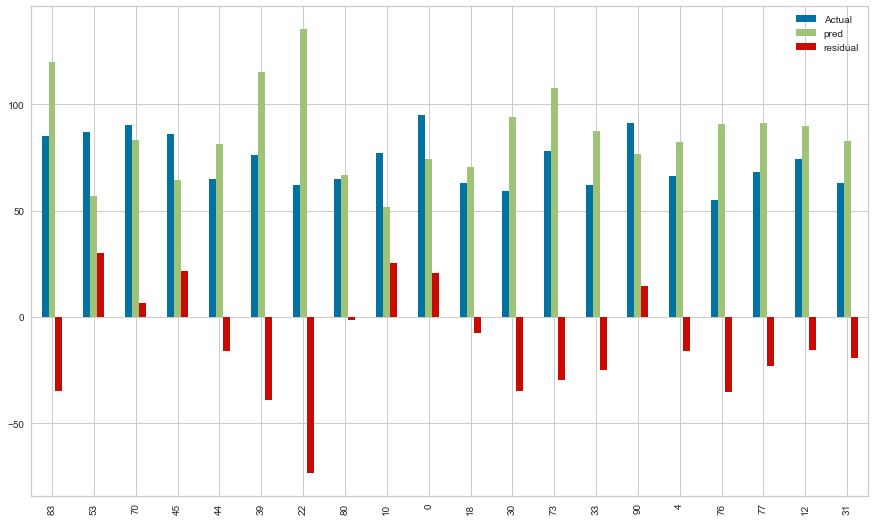

In [218]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

### Evaluation on the Test Set

In [219]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [220]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [221]:
y_test_pred = model_poly.predict(x_test)

In [222]:
y_train_pred = model_poly.predict(x_train)

In [223]:
eval_metric(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -4.176988460691414
MAE 		: 21.993897763058825
MSE 		: 705.6177749828388
RMSE 		: 26.563466923254555


In [224]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6542419458006776
MAE 		: 5.4638405963703525
MSE 		: 49.83777762089494
RMSE 		: 7.05958763816237


### Plotting residuals

In [225]:
residuals = y_test - y_test_pred

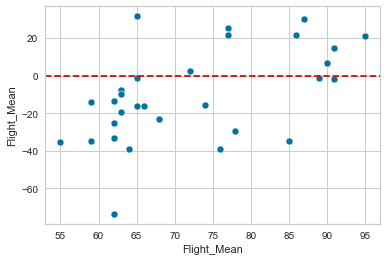

In [226]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

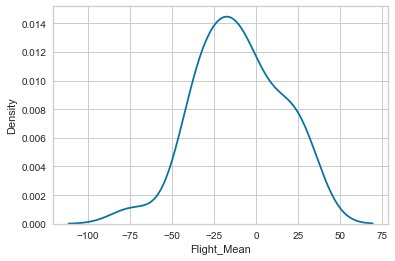

In [227]:
plt.figure(figsize = (6,4))
sns.kdeplot(residuals)
plt.show()

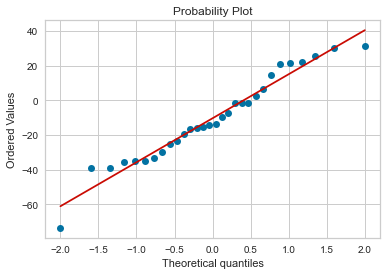

In [228]:
plt.figure(figsize = (6,4))
stats.probplot(residuals, dist ="norm", plot =plt);
plt.show()

In [229]:
# Normal   : -0.5 -- +0.5
# Moderate : +0.5 -- +1.0
# Skewed   : > +1.0
skew(residuals)

-0.1486128285231506

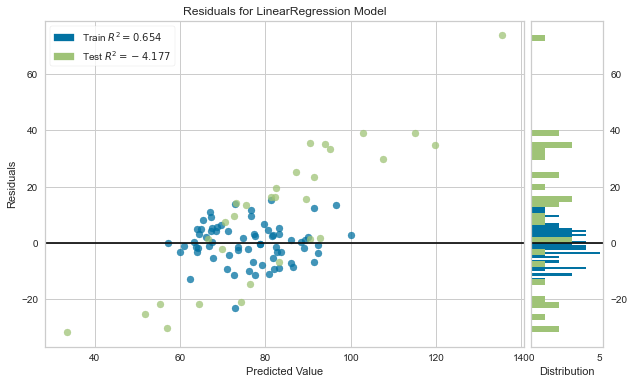

In [230]:
from yellowbrick.regressor import ResidualsPlot # Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

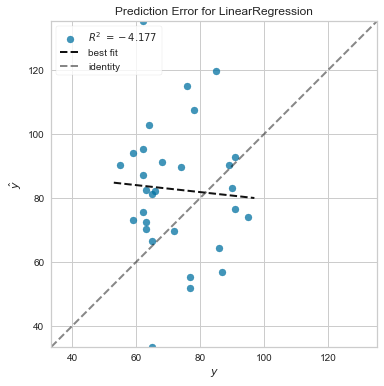

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [231]:
from yellowbrick.regressor import PredictionError # Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()     

### Final Model

In [232]:
final_model = LinearRegression()

In [233]:
final_poly_converter = PolynomialFeatures(degree = 2, include_bias=False)

In [234]:
poly_features = final_poly_converter.fit_transform(x)

In [235]:
final_model.fit(poly_features , y)

LinearRegression()

### Prediction

In [236]:
# MI_list = []
# for i in range(1,9):
#     a = input(f"Enter MI_Cat Number {i} of 8:")
#     MI_list.append(a)
# pred = [MI_list]
# pred

In [237]:
x.columns

Index(['Ling_Int', 'Math_Int', 'Spa_Int', 'Mus_Int', 'Nat_Int', 'Body_Int',
       'Interp_Int', 'Intrap_Int'],
      dtype='object')

In [238]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]

In [239]:
pred_data = pd.DataFrame(data=pred, columns=x.columns)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [240]:
pred_poly = final_poly_converter.fit_transform(pred)

In [241]:
pred_poly

array([[  35.,   36.,   34.,   37.,   15.,   17.,   19.,   21., 1225.,
        1260., 1190., 1295.,  525.,  595.,  665.,  735., 1296., 1224.,
        1332.,  540.,  612.,  684.,  756., 1156., 1258.,  510.,  578.,
         646.,  714., 1369.,  555.,  629.,  703.,  777.,  225.,  255.,
         285.,  315.,  289.,  323.,  357.,  361.,  399.,  441.]])

In [242]:
final_model.predict(pred_poly) 

array([-18.07267649])

In [243]:
MI_Cat = x.columns[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = final_model.predict(pred_poly)[0].astype("int")

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nFlight_Score\t\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: -18
Result		: Not Pilot


### Metrics for MI_Cat and Prediction

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

k = 2

while k < 10:
    a = stu.columns[k].rpartition('_')[0]
    df = stu[stu["MI_Cat"] == a]
    x = df.drop(columns=["MI_Cat","Flight_Mean"])
    y = df["Flight_Mean"]

    polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)
    poly_features = polynomial_converter.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

    model_poly = LinearRegression()
    model_poly.fit(x_train, y_train)

    y_test_predict = model_poly.predict(x_test)
    y_train_predict = model_poly.predict(x_train)
    
    print()
    print(f"-----------------------------------{stu.columns[k]}-----------------------------------")
    print()
    print(f"----------eval_metrics_test_{a}----------")
    print()
    print(f"RMSE\t\t: {np.sqrt(mean_squared_error(y_test, y_test_predict))}")
    print(f"MAE\t\t\t: {mean_absolute_error(y_test, y_test_predict)}")
    print(f"MSE\t\t\t: {mean_squared_error(y_test, y_test_predict)}")
    print(f"R2_score\t: {r2_score(y_test, y_test_predict)}")
    print()
    print(f"---------eval_metrics_train_{a}----------")
    print()
    print(f"RMSE\t\t: {np.sqrt(mean_squared_error(y_train, y_train_predict))}")
    print(f"MAE\t\t\t: {mean_absolute_error(y_train, y_train_predict)}")
    print(f"MSE\t\t\t: {mean_squared_error(y_train, y_train_predict)}")
    print(f"R2_score\t: {r2_score(y_train, y_train_predict)}")
    k+=1


-----------------------------------Ling_Int-----------------------------------

----------eval_metrics_test_Ling----------

RMSE		: 37.15321465428914
MAE			: 28.19637251968705
MSE			: 1380.3613591476849
R2_score	: -56.90106372263778

---------eval_metrics_train_Ling----------

RMSE		: 4.437337962598348e-14
MAE			: 3.811092855440537e-14
MSE			: 1.9689968194316455e-27
R2_score	: 1.0

-----------------------------------Math_Int-----------------------------------

----------eval_metrics_test_Math----------

RMSE		: 30.451838324925244
MAE			: 23.200964970514843
MSE			: 927.3144573673859
R2_score	: -5.567964284142618

---------eval_metrics_train_Math----------

RMSE		: 3.399402263541476e-14
MAE			: 2.842170943040401e-14
MSE			: 1.1555935749370911e-27
R2_score	: 1.0

-----------------------------------Spa_Int-----------------------------------

----------eval_metrics_test_Spa----------

RMSE		: 30.828014775317207
MAE			: 25.14879909166355
MSE			: 950.3664949871761
R2_score	: -10.260266528284

In [245]:
# FINDING THE BEST DEGREE (FOR MI_CAT)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def poly(d):

    test_rmse_errors = []
    train_rmse_errors = []

    k = 2
    
    while k < 10:
        a = stu.columns[k].rpartition('_')[0]
        df = stu[stu["MI_Cat"] == a]
        x = df.drop(columns=["MI_Cat","Flight_Mean"])
        y = df["Flight_Mean"]

        for i in range(1, d):

            polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)
            poly_features = polynomial_converter.fit_transform(x)

            x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

            model_poly = LinearRegression()
            model_poly.fit(x_train, y_train)

            y_test_predict = model_poly.predict(x_test)
            y_train_predict = model_poly.predict(x_train)

            test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_predict))
            train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_predict))
                
            test_rmse_errors.append(test_RMSE)
            train_rmse_errors.append(train_RMSE)

        k+=1
        
    return pd.DataFrame({"test_rmse_errors":test_rmse_errors, "train_rmse_errors": train_rmse_errors})

In [246]:
test_rmse_errors = poly(11)["test_rmse_errors"].unique()
train_rmse_errors = poly(11)["train_rmse_errors"].unique()
test_rmse_errors
train_rmse_errors

array([4.43733796e-14, 3.39940226e-14, 3.77202627e-14, 5.35924893e-14,
       1.19050852e-13, 6.85222599e-14, 7.10542736e-15, 1.80155465e-14])

### Prediction

In [247]:
# MI_list = []
# for i in range(1,9):
#     a = input(f"Enter MI_Cat Number {i} of 8:")
#     MI_list.append(a)
# pred = [MI_list]
# pred

In [248]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=x.columns)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [249]:
a = MI_Cat.rpartition('_')[0]
df = stu[stu["MI_Cat"] == a]

x = df.drop(columns=["MI_Cat","Flight_Mean"])
y = df["Flight_Mean"]

final_model = LinearRegression()
final_model.fit(x, y)

LinearRegression()

In [250]:
MI_Cat = x.columns[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = final_model.predict(pred)[0].astype("int")

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 137
Result		: Pilot
